We have just completed the Codecademy Data Science lesson on Logistic Regression. 

As a review exercise, we were asked to find another dataset for binary classification from Kaggle or take a look at sklearn‘s breast cancer dataset. 

We were tasked with using sklearn to build our own Logistic Regression model on the data and make some predictions. Which features are most important in the model you build?

I have decided to use the breast cancer dataset.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer

In [31]:
# Load the breast cancer data
breast_cancer_dataset = load_breast_cancer()
print(breast_cancer_dataset.target_names)

# Printing the target names, we see that the dataset set assigns 0 to indicate a malignant cancer and 1 to 
#indicate a benign cancer. I would like to invert it so that a positive or present result (1) indicates a malignant 
# cancer, and 0 indicates a benign cancer.
new_target = 1-breast_cancer_dataset.target

['malignant' 'benign']


In [43]:
# Normalize our data - I am not 100% this is the correct step, but let us try it. I understood from the lesson, that
# using the magnitudes of the coefficients to interpret feature importance is only meaningful if the data is 
# normalized, which makes sense, otherwise the features with larger values will overtake the features with smaller
# values
normalized_data = preprocessing.normalize(breast_cancer_dataset.data)

In [37]:
# Split the breast cancer data into a training set and a test set (using .8/.2 split)
training_data, test_data, training_class, test_class = train_test_split(normalized_data,\
                                                                        new_target,\
                                                                        test_size=0.2,\
                                                                        random_state=23)

In [38]:
# Create a logistical regression model
model = LogisticRegression()

# Fit the training data to the model
model.fit(training_data, training_class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Find the coefficients and convert from Numpy array to a list
coefficients = model.coef_
coefficients = coefficients.tolist()[0]
print(coefficients)

[-0.5014766324700688, -0.9522524361443042, -3.0430338211618824, -4.327901969916484, -0.005286514265540874, -0.0011349997702961973, 0.0034885990716971653, 0.0017801933053610015, -0.01009719789822413, -0.004058931122228735, -0.005743162983592623, -0.0832551388051223, -0.036978810715088295, 0.6839801374746337, -0.0005173415495521395, -0.0006660784099087127, -0.0008596039157499557, -0.0003290335759614264, -0.0013244582935506564, -0.00020976992768599118, -0.4727924046608963, -1.1715317714420055, -2.8456938902094806, 3.9655789881784105, -0.006812753689275816, 0.0012695439098593607, 0.006815651400648496, 0.0016481910919363672, -0.013749690710369716, -0.004251748112024793]


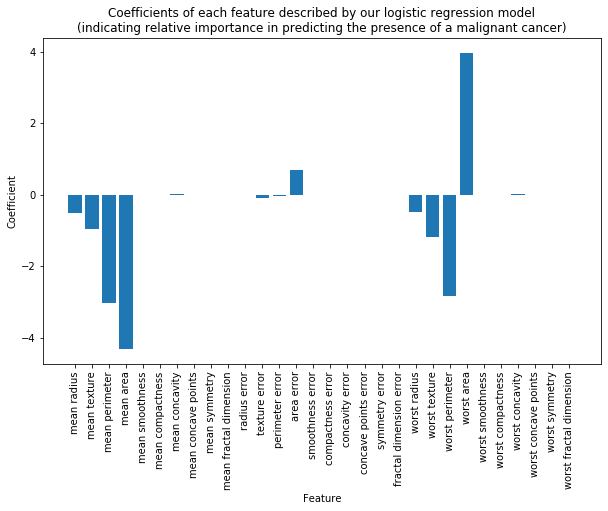

In [42]:
# Graph the coefficients
fig = plt.figure(figsize=(10,6))
ax = plt.subplot()
x_values = range(len(coefficients))
plt.bar(x_values, coefficients)
ax.set_xticks(x_values)
ax.set_xticklabels(breast_cancer_dataset.feature_names, rotation='vertical')
plt.title('Coefficients of each feature described by our logistic regression model\n(indicating relative importance in predicting the presence of a malignant cancer)')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

The most important indicators of the presence of a malignant cancer are 'worst area' (positive coefficient), 'mean area' (negative coefficient), 'mean perimeter' (negative coefficient), 'worst perimeter' (negative coefficient) and 'worst texture' (negative coefficient).

Positive coefficients increase the probability of the data sample belonging to the positive class (in our model, malignant cancer). Negative coefficients decrease this probability.